The Discrete Fourier Transform. Used to Construct Sound Waves as will be demonstrated

In [8]:
import IPython
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
from matplotlib import pyplot as plt
import time

In [3]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12, 3)      # Change plot size / aspect (you may adjust this).

In [4]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self.rate = rate
        self.samples = samples

    def plot(self, boolean=False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        if boolean:
            n = len(self.samples)
            k = np.arange(n)

            # Convert frequencies to Hertz
            freqs = k * self.rate / n

            # Obtain magnitudes
            spectrum = np.abs(fft(self.samples))  

            # Assure only the first half will be plotted
            half_n = n // 2
            freqs = freqs[:half_n]
            spectrum = spectrum[:half_n]

            # Assue that zero-magnitude frequencies are not plotted
            mask = spectrum > 0
            freqs = freqs[mask]
            spectrum = spectrum[mask]

            # Plot the DFT's
            plt.plot(freqs, spectrum)
            plt.xlabel("Present Frequencies")
            plt.ylabel("Magnitude")
            plt.title("SoundWave: Frequency Domain")

            plt.ylim(bottom=np.min(spectrum) * 0.9) # exlude magnitude 0 frequencies in plot

            plt.tight_layout()
            plt.show()
            
        else:
            # Calulate length of sound wave in seconds
            length = len(self.samples) / self.rate

            # Create time array for plotting
            time = np.linspace(0, length, len(self.samples))

            # Plot the stored soundwave
            plt.plot(time, self.samples)
            plt.xlabel(f"Time in seconds")
            plt.ylabel("Amplitude")
            plt.ylim(-32768, 32767)
            plt.title("Sound wave")
            plt.tight_layout()
            plt.show()

    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        # Scale the samples using the given equation if the array of samples does not have np.int16 as its data type or if false is Flase
        if self.samples.dtype != np.int16 or force:
            scaled_samples = np.int16(self.samples / np.max(np.abs(self.samples)) * 32767)
        else:
            scaled_samples = self.samples               # Keep the original samples 

        # Write to the specified file
        wavfile.write(filename, self.rate, scaled_samples)
    
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        # Raise ValueError if sample arrays from A and B are not same length
        if len(self.samples) != len(other.samples):
            raise ValueError("Samples arrays from A and B are not same length")

        # Convert to floating point for mixing to prevent clipping
        float_samples1 = self.samples.astype(np.float32) / 32767.0
        float_samples2 = other.samples.astype(np.float32) / 32767.0
        
        # Mix the samples (average) to prevent distortion
        samples_combined = (float_samples1 + float_samples2) / 2
        
        # Scale back to int16 range and clip
        samples_combined = np.int16(samples_combined * 32767)

        return SoundWave(self.rate, samples_combined)

    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        # Raise ValueError if the samples rates from the two objects are not equal
        if self.rate != other.rate:
            raise ValueError("Samples rates from the two objects are not equal")
        
        # Concenate samples
        concatenated_samples = np.concatenate((self.samples, other.samples))
        
        return SoundWave(self.rate, concatenated_samples)

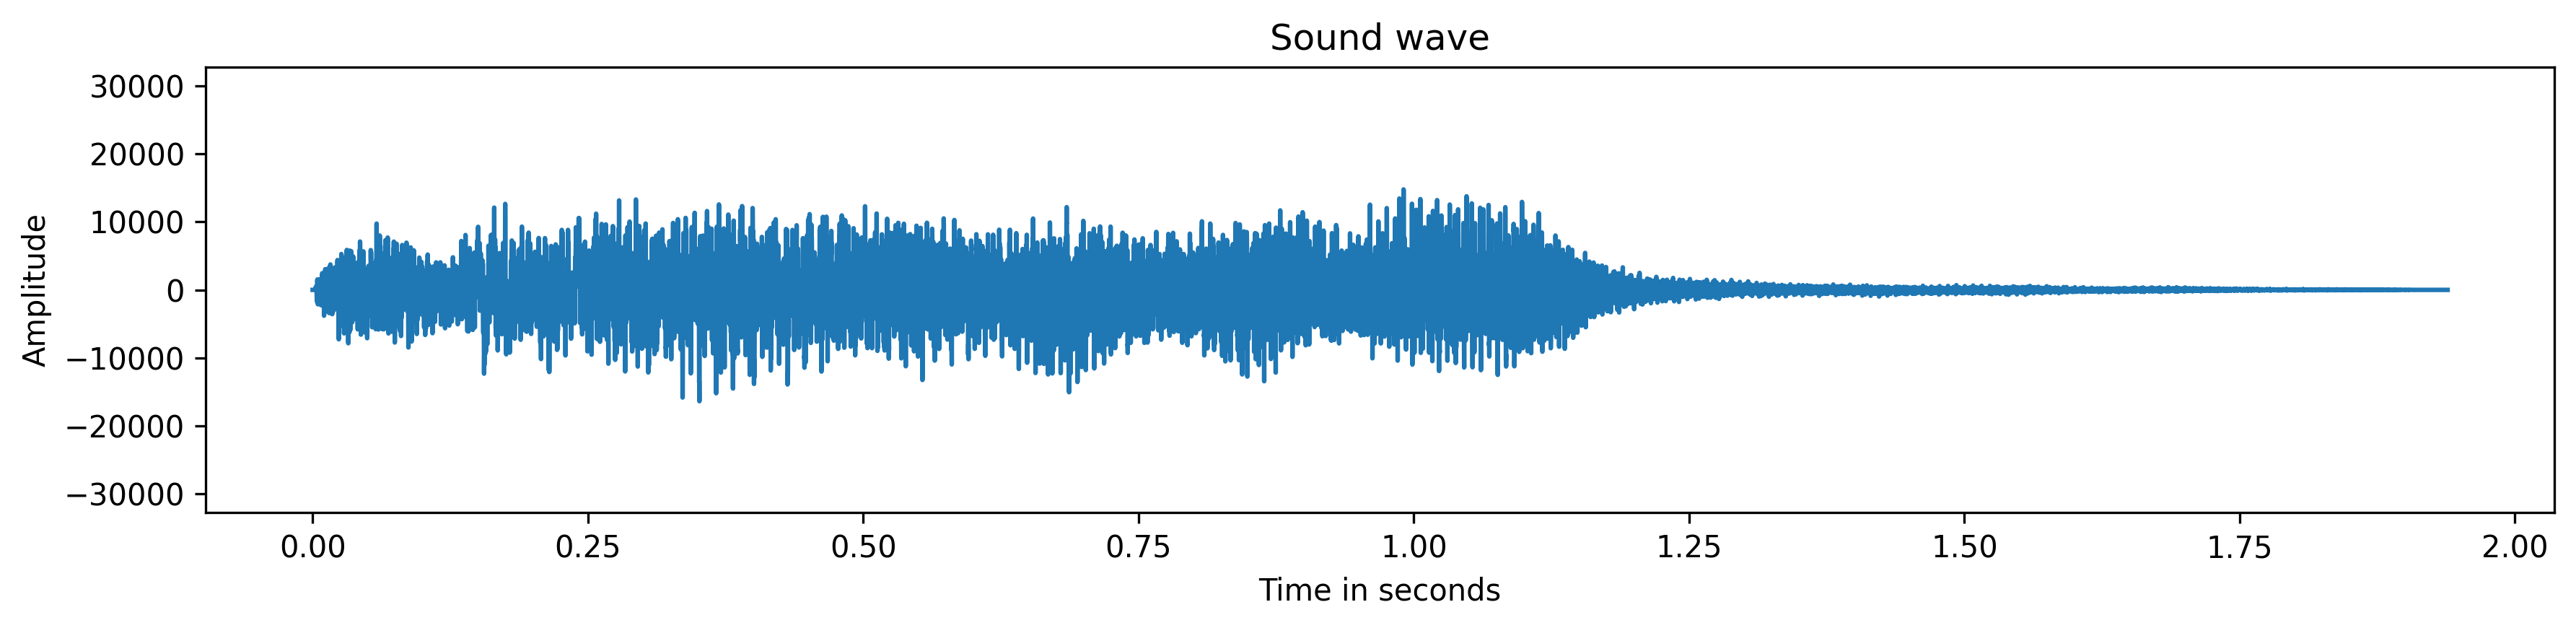

In [8]:
"""- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use SciPy's `wavfile.read()` and the `SoundWave` class to plot `tada.wav` in the cell below. """

rate, samples = wavfile.read("tada.wav") 
s = SoundWave(rate, samples)
s.plot()

In [4]:
"""- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and two new versions of `tada.wav` in the cells below. """

rate, samples = wavfile.read('tada.wav')
s = SoundWave(rate, samples)
    
# Display original audio file
print("Original tada.wav:")
IPython.display.Audio('tada.wav')

Original tada.wav:


In [5]:
# Export without scaling
s.export('tada_original.wav')

# Display unscaled original sound
IPython.display.Audio('tada_original.wav')

In [6]:
# Export with scaling
s.export('tada_scaled.wav', force=True)

# Display scaled sound
display(IPython.display.Audio('tada_scaled.wav'))

In [6]:
"""- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds."""

def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    # Use sample rate of 44100
    r = 44100

    # Create time array
    time = np.linspace(0, duration, int(r * duration), endpoint=False)

    # Sample from sinusoid of period 1, then scale samples
    samples = np.sin(2 * np.pi * frequency * time)
    samples = np.int16(samples * 32767)

    return SoundWave(r, samples)

In [8]:
# Generate A tone for two seconds
note = generate_note(440, 2)
note.export("A.wav")
IPython.display.Audio('A.wav')

In [9]:
"""- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the first cell below.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A &rarr; C &rarr; E, where each tone lasts one second, and embed it in the second cell below. """

# Generate three second A minor chord
A = generate_note(440, 3)
C = generate_note(523.25, 3)
E = generate_note(659.25, 3)

# Add notes element wise
a_minor = A + C + E

a_minor.export("a_minor.wav")

IPython.display.Audio('a_minor.wav')


In [10]:
# Generate three second A minor chord
A = generate_note(440, 1)
C = generate_note(523.25, 1)
E = generate_note(659.25, 1)

arpeggio = A >> C >> E
arpeggio.export('arpeggio.wav')

IPython.display.Audio('arpeggio.wav')

In [7]:
# Code to play not like us tune (ignore)
f_sharp = generate_note(739.98, .3)
lil_break = generate_note(0.01, .02)
f_sharp_2 = generate_note(739.98, .3)
f_sharp_3 = generate_note(739.98, .2)

g = generate_note(783.99, .3)

arpeggio = f_sharp >> lil_break >> f_sharp_2 >> g >> f_sharp_3
arpeggio.export("kendrickarpeggio.wav")

IPython.display.Audio("kendrickarpeggio.wav")

In [11]:
# Implement Simple DFT
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    # Assure f is formatted correctly
    f = np.asarray(samples)
    
    n = len(f)

    # Construct omega
    omega_n = np.exp(2j * np.pi / n)

    # Create Fn
    k = np.arange(n)
    Fn = np.zeros((n, n), dtype=complex)

    # Build Fn by each row and column
    for i in range(n):
        for j in range(n):
            Fn[i, j] = omega_n ** (-i * j)
    
    Fn = Fn / n

    # Compute Fourier coefficients
    c = np.dot(Fn, f)

    return c

In [12]:
test_samples = np.random.random(5)
my_c = simple_dft(test_samples)

scipy_c = fft(test_samples) / len(test_samples)

print("C Calculated using simple_dft")
print(my_c)
print()
print("Scipy c")
print(scipy_c)

print(np.allclose(my_c, scipy_c))

C Calculated using simple_dft
[ 0.41708352+0.j         -0.19484135-0.02469619j  0.04365583+0.07980169j
  0.04365583-0.07980169j -0.19484135+0.02469619j]

Scipy c
[ 0.41708352-0.j         -0.19484135-0.02469619j  0.04365583+0.07980169j
  0.04365583-0.07980169j -0.19484135+0.02469619j]
True


In [13]:
# Implement simple Fast Fourier Transformation
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    n = len(samples)

    if n <= threshold:
        return simple_dft(samples)         # Use function from problem 5 if number of samples is small enough
    else:
        even = simple_fft(samples[::2], threshold)      # Get the DFT of every other entry of g, starting from 0.
        odd = simple_fft(samples[1::2], threshold)      # Get the DFT of every other entry of g, starting from 1.

        # Eliminate need for loop with arange and array broadcasting
        k = np.arange(n)
        zk = np.exp(-2j * np.pi * k / n)

        m = n // 2         # Get middle index for z

        # Concatenate two arrays of length m
        return np.concatenate([even + zk[:m] * odd, even + zk[m:] * odd]) 
  


In [14]:
# Compare c vs scipys c
test_samples = np.random.random(8)
my_c = simple_fft(test_samples)

scipy_c = fft(test_samples) 

print("C Calculated using simple_dft:")
print(my_c)
print()
print("Scipy c:")
print(scipy_c)
print(np.allclose(my_c, scipy_c))
print()

# Time and compare previous func from prob 5, this func, and scipy c using large array of 8192 entries
large_samples = np.random.random(8192)

# Time simple_dft 
start = time.time()
my_dft = simple_dft(large_samples)
dft_time = time.time() - start
    
# Time simple_fft 
start = time.time()
my_fft = simple_fft(large_samples)
fft_time = time.time() - start
    
# Time SciPy's FFT
start = time.time()
scipy_fft = fft(large_samples)
scipy_time = time.time() - start
    
# Compare results
print(f"Simple DFT Time: {dft_time} seconds")
print(f"Simple FFT Time: {fft_time} seconds")
print(f"SciPy FFT Time: {scipy_time} seconds")



C Calculated using simple_dft:
[ 3.56929272+0.00000000e+00j  0.21392395-9.66832290e-01j
 -1.55347818-2.99507455e-01j -0.16460656-4.53720027e-01j
  0.01212773-2.17813536e-16j -0.16460656+4.53720027e-01j
 -1.55347818+2.99507455e-01j  0.21392395+9.66832290e-01j]

Scipy c:
[ 3.56929272-0.j          0.21392395-0.96683229j -1.55347818-0.29950746j
 -0.16460656-0.45372003j  0.01212773-0.j         -0.16460656+0.45372003j
 -1.55347818+0.29950746j  0.21392395+0.96683229j]
True

Simple DFT Time: 22.357867002487183 seconds
Simple FFT Time: 0.14326691627502441 seconds
SciPy FFT Time: 0.0004119873046875 seconds


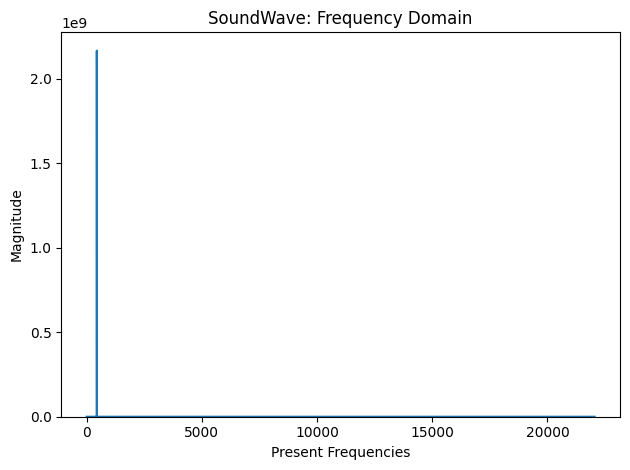

In [24]:
# Plot of DFT of A tone
A = generate_note(440, 3)

A.plot(True) 


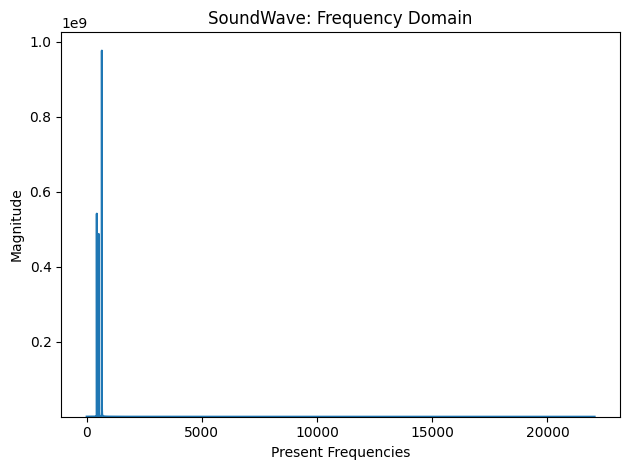

In [25]:
# Plot of DFT of A minor chord
A = generate_note(440, 3)
C = generate_note(523.25, 3)
E = generate_note(659.25, 3)

a_minor = A + C + E

a_minor.plot(True)


Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

In [16]:
rate, samples = wavfile.read("mystery_chord.wav")
n = len(samples)

# Get the magnitudes for positive frequencies
magnitudes = np.abs(fft(samples))[:n // 2]  

# Get the three highest indices, which will correspond to the frequencies of the three notes
four_indices = np.argsort(magnitudes)[-4:][::-1]  
frequencies = four_indices * rate / n 

print(frequencies)

[440.   784.   523.25 587.5 ]


The notes are... A, G, C, D